 ## Basic Stock Price Prediction


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 147.5+ KB


In [5]:
housing.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337148,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [6]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'adjClose'}>,
        <AxesSubplot:title={'center':'adjHigh'}>],
       [<AxesSubplot:title={'center':'adjLow'}>,
        <AxesSubplot:title={'center':'adjOpen'}>,
        <AxesSubplot:title={'center':'adjVolume'}>,
        <AxesSubplot:title={'center':'divCash'}>],
       [<AxesSubplot:title={'center':'splitFactor'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

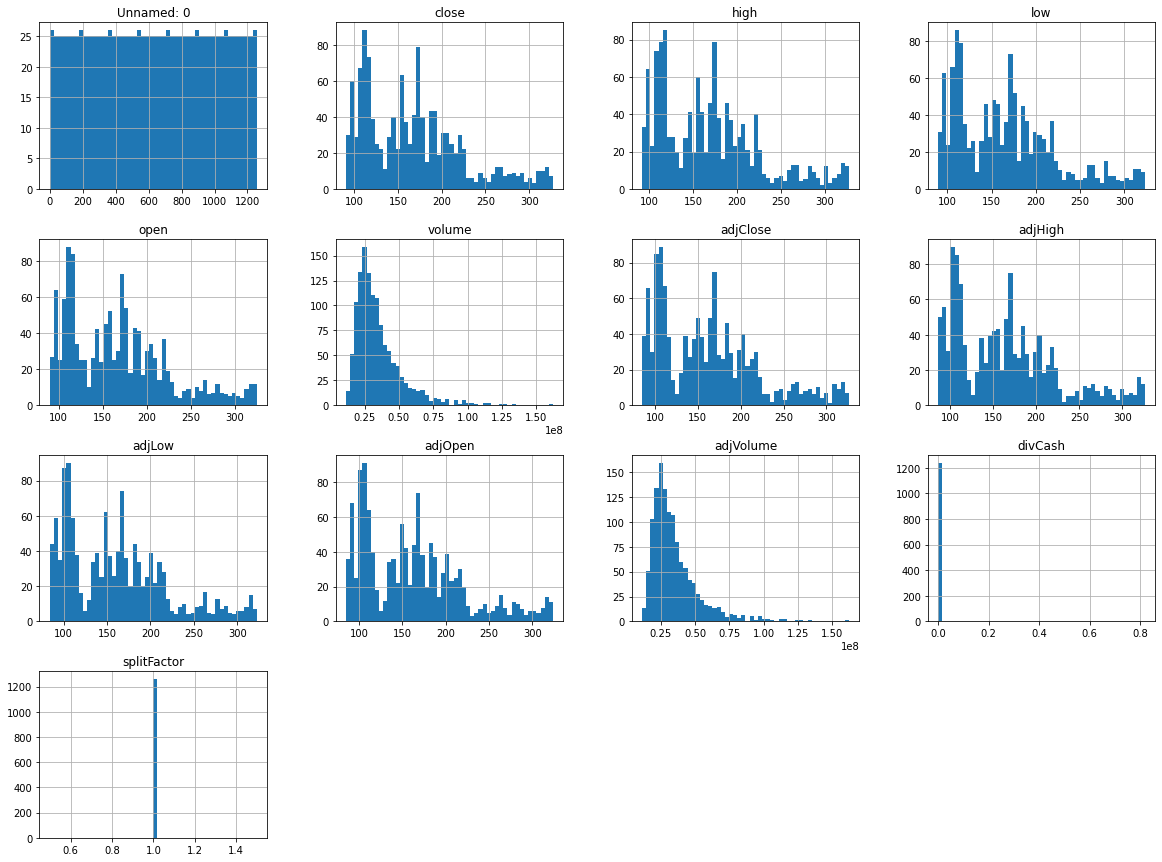

In [7]:
housing.hist(bins=50, figsize=(20,15))

# Train-Test Spilliting

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation (len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set,test_set= split_train_test(housing, 0.2)

In [12]:
print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}\n")

Rows in train set: 1007 
 Rows in test set: 251



In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)} \n Rows in test set: {len(test_set)}\n")

Rows in train set: 1006 
 Rows in test set: 252



<AxesSubplot:>

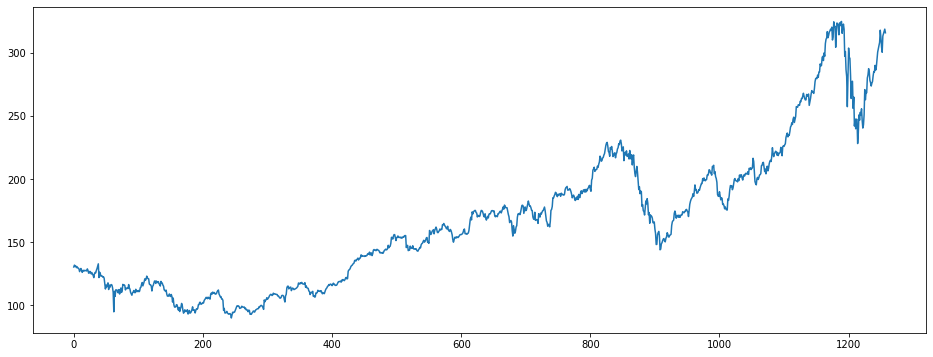

In [15]:
housing['open'].plot(figsize=(16,6))

In [17]:
housing.rolling(7).mean().head(20)

C:\Users\Avishek kumar\AppData\Local\Temp\ipykernel_30984\199217181.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'symbol'], dtype='object')
  housing.rolling(7).mean().head(20)


,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,130.582857,131.317857,129.890000,130.675714,3.752358e+07,120.335159,121.012478,119.696675,120.420729,3.752358e+07,0.0,1.0
7,4.0,130.097857,130.950714,129.648571,130.555714,3.606552e+07,119.888220,120.674148,119.474193,120.310146,3.606552e+07,0.0,1.0
8,5.0,129.529286,130.559286,129.038571,130.132857,3.920002e+07,119.364268,120.313437,118.912063,119.920473,3.920002e+07,0.0,1.0
9,6.0,129.120714,130.077857,128.427143,129.485714,3.994158e+07,118.987760,119.869789,118.348618,119.324116,3.994158e+07,0.0,1.0


C:\Users\Avishek kumar\AppData\Local\Temp\ipykernel_30984\4032854158.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'symbol'], dtype='object')
  housing.rolling(window=30).mean()['close'].plot()


<AxesSubplot:>

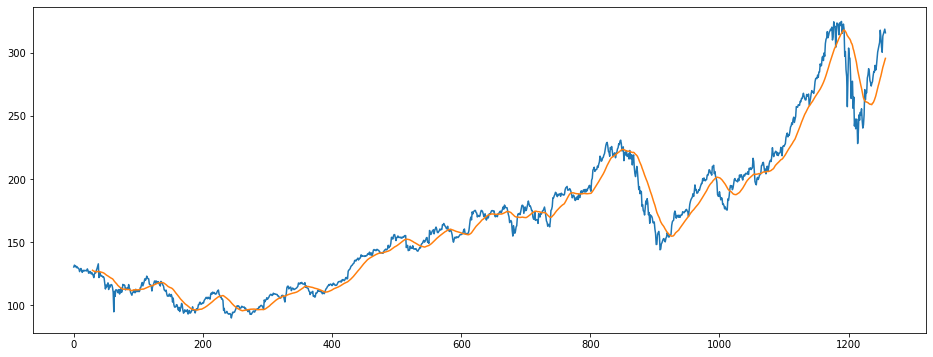

In [18]:
housing['open'].plot(figsize=(16,6))
housing.rolling(window=30).mean()['close'].plot()

<AxesSubplot:>

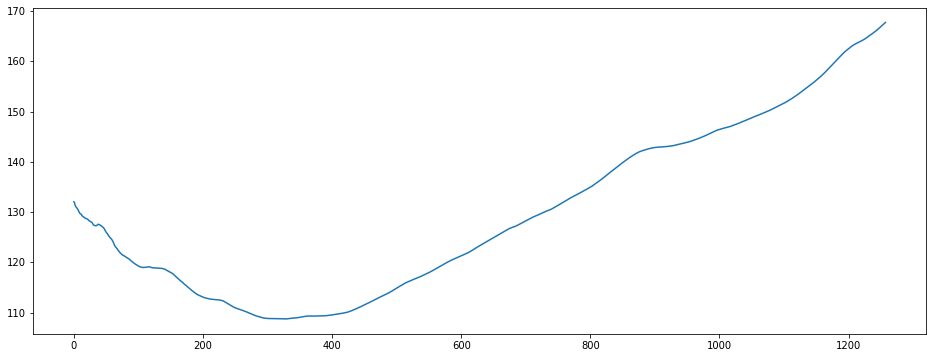

In [19]:
housing['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))